In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles,make_classification

In [15]:
def load_extra_datasets():  
    N = 200
    gaussian_quantiles = make_gaussian_quantiles(mean=None, cov=0.7, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    return  gaussian_quantiles

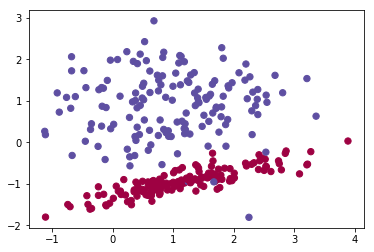

In [16]:
np.random.seed(25)
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1,n_samples=300)

plt.scatter(X1[:,0], X1[:,1], c=Y1, s=40, cmap=plt.cm.Spectral);

In [14]:
class Network():
    """
    Init function
    """
    def __init__(self):

        
    def init_weights(self):
        
        
    def init_biases(self,method):
        
        
    def cost_der(self, a_L, y_true):
    
    def feed_forward(self, batch):
        output = batch
        for b, w in zip(self.B, self.W):
            output = sigmoid(np.dot(w, output)+b)
        return output
    
    def backprop(self,x,y_true):
        nabla_b = [np.zeros(b.shape) for b in self.B]
        nabla_w = [np.zeros(w.shape) for w in self.W]
        
        activation = x
        activations = [x] 
        zs = [] 
        for b, w in zip(self.B, self.W):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
            
        delta = self.cost_der(activations[-1], y_true) * \
            sigmoid_der(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_der(z)
            delta = np.dot(self.W[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)
    
    def generate_batch(self,X,Y,batch_size):
        idx = np.random.randint(low = 0, high = X.shape[0],size = batch_size)
        return X[idx],Y[idx]
    
    def update_mini_batch(self, batch, Y_true, lr):
        
        nabla_b = [np.zeros(b.shape) for b in self.B]
        nabla_w = [np.zeros(w.shape) for w in self.W]
        for x, y in zip(batch,Y_true):
            delta_nabla_b, delta_nabla_w = self.backprop(x.reshape(-1,1), y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]

        self.W = [w-(lr/len(batch))*nw
                        for w, nw in zip(self.W, nabla_w)]
        self.B = [b-(lr/len(batch))*nb
                       for b, nb in zip(self.B, nabla_b)]

    def train(self,X,Y,batch_size=50,epochs=5,steps_per_epoch=100,lr=0.05):
        for j in range(epochs):
            for step in range(steps_per_epoch):
                batch, Y_true = self.generate_batch(X=X,Y=Y,batch_size=batch_size)
                self.update_mini_batch(batch,Y_true,lr)
            
    def predict(self,X):
        pass

In [277]:
net_architectur = {
    "num_layers":3,
    "num_units":[15,12,2],
    "activations":["sigmoid","sigmoid","sigmoid"],
    "weights_init_method":"standart_normal",
    "biases_init_method":"random",
    "loss":"quadratic",
    "input_x_shape":2,
    "batch_size":10,
    "epochs":3,
    "steps_per_epoch":100
}

In [278]:
net = Network(**net_architectur)
net.train(X1,Y1,batch_size=50,epochs=10,steps_per_epoch=15,lr=0.5)

Dense_0---num_units = 15, input size = (2,), activation = sigmoid


Dense_1---num_units = 12, input size = (15,), activation = sigmoid


Dense_2---num_units = 2, input size = (12,), activation = sigmoid




In [248]:
pred = [np.argmax(net.feed_forward(X1[i].reshape(-1,1))) for i in range(300)]

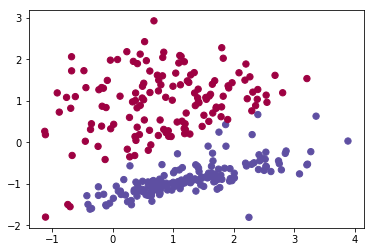

In [249]:
plt.scatter(X1[:,0], X1[:,1], c=pred, s=40, cmap=plt.cm.Spectral);